In [1]:
import sys
sys.path.append('../')
from src.realtime_utils import *
from plotnine import *

### Bar plot

In [2]:
def fraction_by_age():    

    rt_sari = load_rt('sari', preprocessed=True)

    value_cols = [f'value_{d}w' for d in [0, 1, 2, 3, 4]]

    rt_sari[value_cols] = rt_sari[value_cols].cumsum(axis=1)

    rt_sari = rt_sari.dropna()

    df = rt_sari.groupby(['location', 'age_group'])[value_cols].sum().reset_index()

    for col in value_cols:
        df[col] = df[col] / df['value_4w']

    df[value_cols[1:]] = df[value_cols].diff(axis=1)[value_cols[1:]]

    df_melted = df.melt(id_vars=['location', 'age_group'], var_name='delay', value_name='value')

    df_melted.delay = df_melted.delay.str[-2:-1]

    df_melted['delay'] = pd.Categorical(df_melted['delay'], categories=['4', '3', '2', '1', '0'], ordered=True)

    return (ggplot(df_melted, aes(x='age_group', y='value', fill='delay')) +
            geom_bar(stat='identity', alpha=1) +
            scale_fill_brewer(type="div", palette='RdYlGn') +
            theme_bw(base_size=11) +
            theme(
                panel_grid_major=element_line(size=0.05),
                panel_grid_minor=element_line(size=0.05)
            ) +
            labs(
                x='',
                y='Fraction of final report',
                fill='Weeks after\ninitial report'
            ))

In [3]:
p = fraction_by_age()

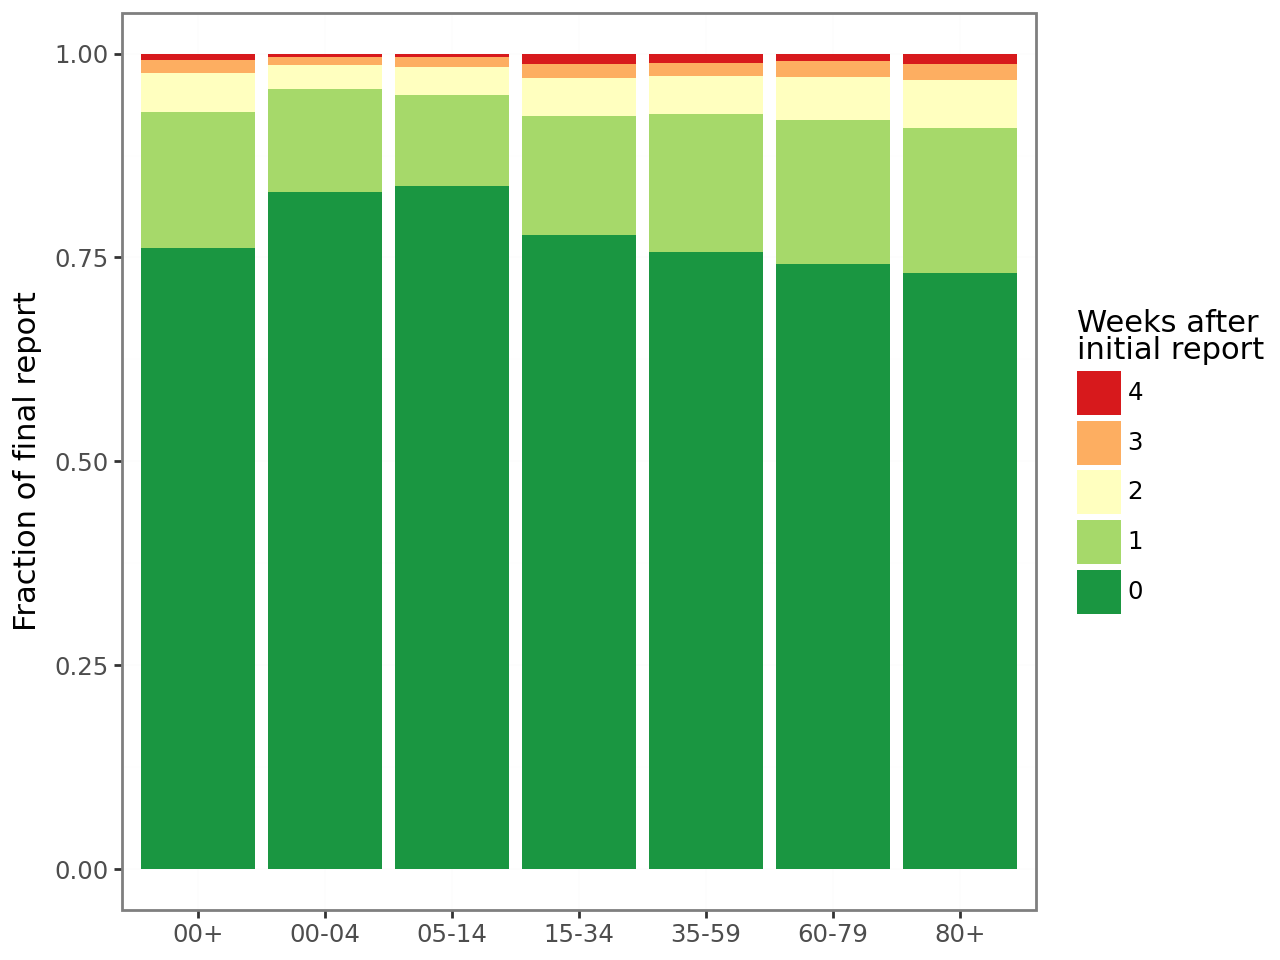

In [4]:
p.show()

In [5]:
p.save("../figures/fraction_age.pdf", width=150, height=80, units="mm", dpi=300)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 150.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/fraction_age.pdf


### Over time

In [6]:
def fraction_over_time(stratum=None):
    rt_sari = load_rt('sari', preprocessed=True)
    value_cols = [f'value_{d}w' for d in [0, 1, 2, 3, 4]]
    
    if stratum is None:
        df = rt_sari.copy()
        df.age_group = df.age_group.astype('category')
        df['age_group'] = df['age_group'].cat.reorder_categories(['00-04', '05-14', '15-34', '35-59', '60-79', '80+', '00+'])
        
    elif stratum == 'national':
        df = rt_sari[rt_sari.age_group == '00+']
        
    elif stratum == 'age':
        df = rt_sari[rt_sari.age_group != '00+']

    df.loc[:, value_cols] = df[value_cols].cumsum(axis=1)

    df = df.dropna()

    df[value_cols] = df[value_cols].apply(lambda x: x / df['value_4w'])

    df.loc[:, value_cols[1:]] = df[value_cols].diff(axis=1)[value_cols[1:]]

    df_melted = df.melt(id_vars=['location', 'age_group', 'date'], value_vars=value_cols, var_name='delay', value_name='value')

    df_melted.delay = df_melted.delay.str[-2:-1]

    df_melted['delay'] = pd.Categorical(df_melted['delay'], categories=['4', '3', '2', '1', '0'], ordered=True)

    df_melted.date = pd.to_datetime(df_melted.date)
    

    return (ggplot(df_melted, aes(x='date', y='value', fill='delay', color='delay')) +
            facet_wrap('~age_group', scales='free' if stratum is None else 'fixed') +
            geom_area(position='stack', alpha=1, size=0.3) +
            scale_color_brewer(type='div', palette='RdYlGn', guide=None) +
            scale_fill_brewer(type='div', palette='RdYlGn') +
            theme_bw() +
            labs(
                x='',
                y='Fraction of final report',
                fill='Weeks after\ninitial report'
            ) +
            scale_x_date(date_breaks='3 month', minor_breaks='1 month', date_labels='%b\n%Y'))

In [7]:
p1 = fraction_over_time('national')

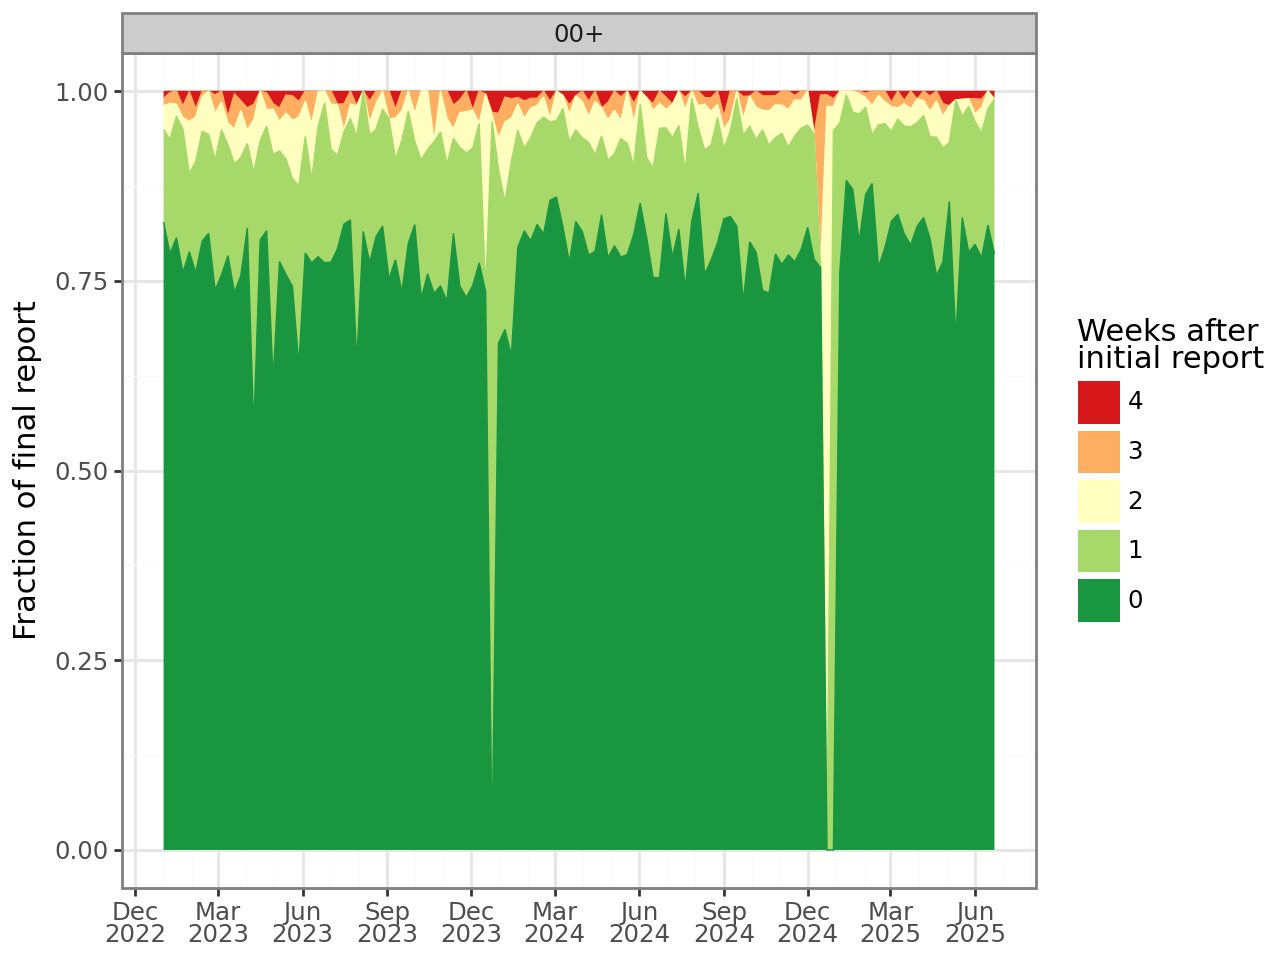

In [8]:
p1.show()

In [9]:
p1.save("../figures/fraction_national_time.pdf", width=150, height=80, units="mm", dpi=300)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 150.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/fraction_national_time.pdf


In [10]:
p2 = fraction_over_time('age')

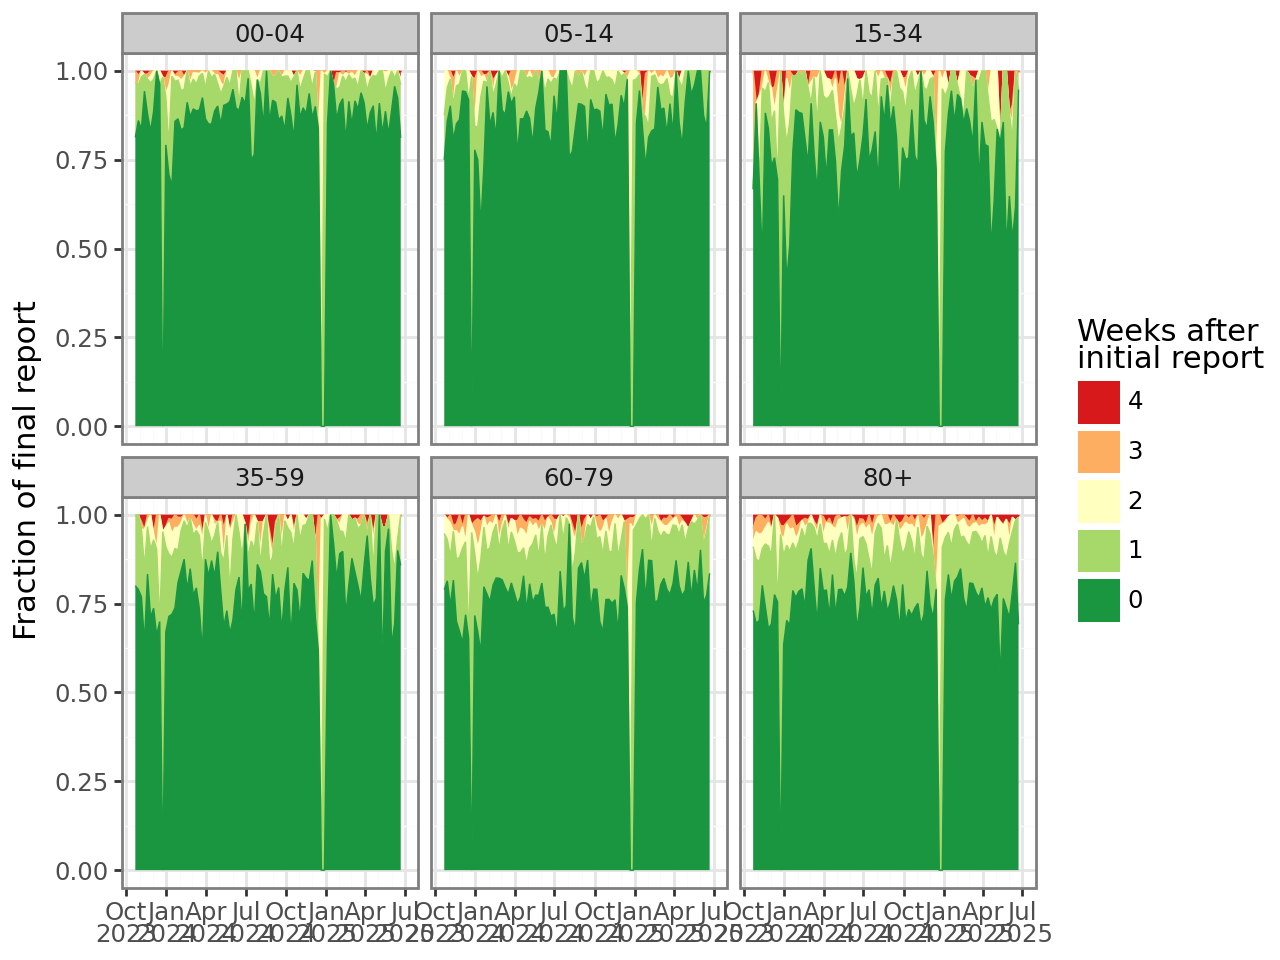

In [11]:
p2.show()

In [12]:
p2.save("../figures/fraction_age_time.pdf", width=180, height=80, units="mm", dpi=300)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 180.00000000000003 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/fraction_age_time.pdf


In [17]:
p3 = fraction_over_time()

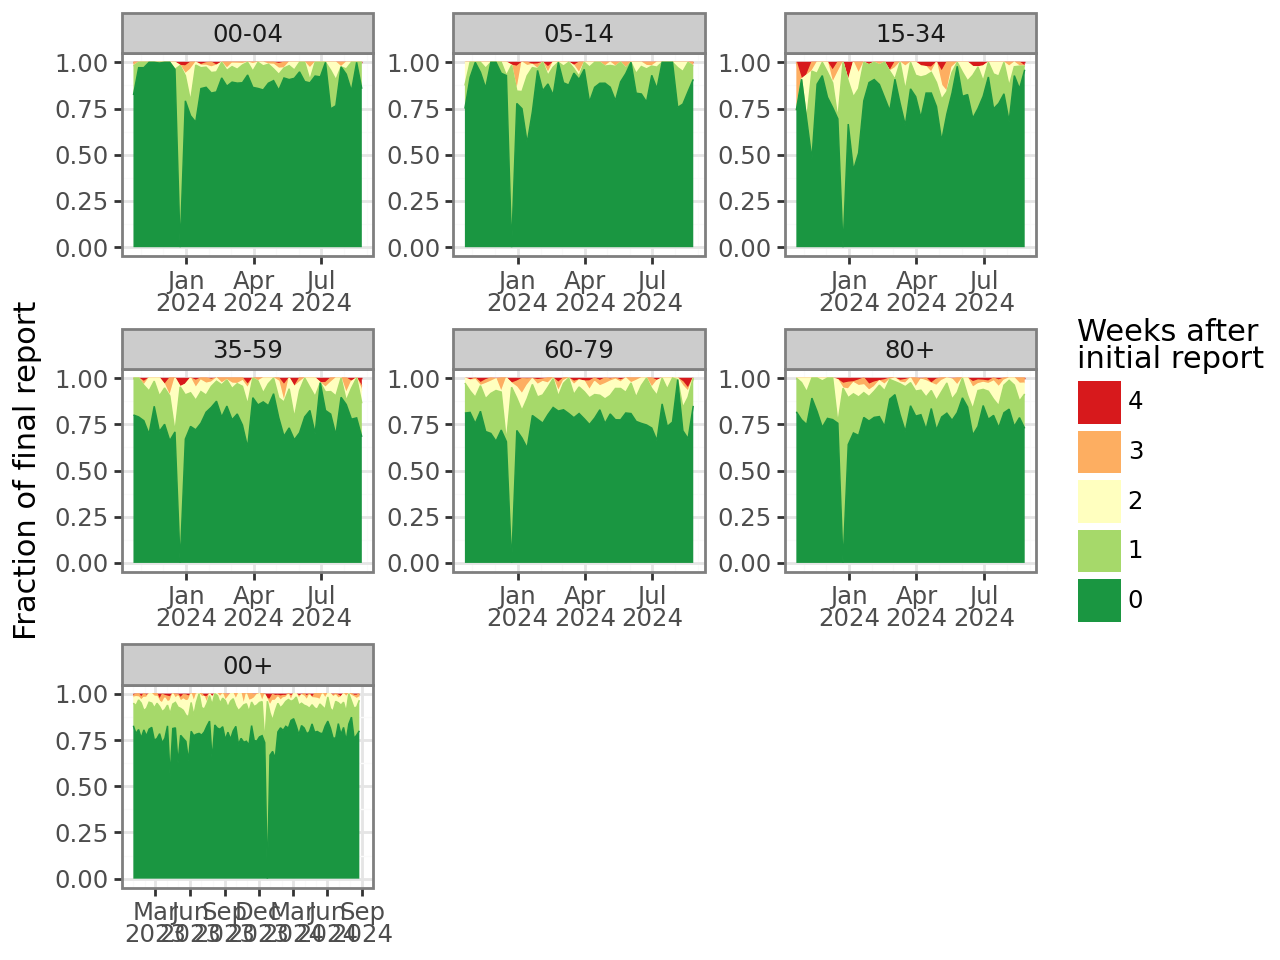

In [18]:
p3.show()

In [19]:
p3.save("../figures/fraction_time.pdf", width=180, height=100, units="mm", dpi=300)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 180.00000000000003 x 100.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/fraction_time.pdf
